In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from tqdm import tqdm
import shutil
import scipy.stats as stats
import os
from sklearn.linear_model import LinearRegression

In [44]:
processed_folder = "processed_CM"
input_folder = "Chameleon"

def process_data_file(input_file: pathlib.Path, output_file: pathlib.Path):
    with open(input_file, 'r') as file:
        line = None
        while line != "Valve opened\n":
            line = file.readline()
            if not line:
                break
        if not line:
            file.seek(0)
            
        with open(output_file, 'w') as new_file:
            new_file.write("time,value\n")
            while True:
                line = file.readline()
                if not line:
                    break
                new_file.write(line)

def process_data():
    if pathlib.Path(processed_folder).exists():
        shutil.rmtree(processed_folder)
    pathlib.Path(processed_folder).mkdir()
    mass_counts = {}
    for input_file in tqdm(pathlib.Path(input_folder).iterdir()):
        if input_file.stem[:7] == "3:21:24":
            continue
        if input_file.suffix != ".csv":
            continue
        mass = float(input_file.as_posix().split(" ")[1][:-1])
        if mass not in mass_counts:
            mass_counts[mass] = 0
        else:
            mass_counts[mass] += 1
        new_file_name = f"{mass}_{mass_counts[mass]}.csv"
        output_file = pathlib.Path(processed_folder) / new_file_name
        # print(f"Processing {input_file} to {output_file}")
        process_data_file(input_file, output_file)

process_data()

15it [00:00, 814.25it/s]


In [4]:
def get_slope(data: pd.DataFrame, slope_range: int):
    start_value = data.iloc[0:500]["value"].mean()
    end_value = data.iloc[-500:]["value"].mean()
    middle_value = (start_value + end_value) / 2
    middle_index = (data["value"] - middle_value).abs().idxmin()
    slope = np.polyfit(data.iloc[middle_index - int(slope_range/2):middle_index + int(slope_range/2)]["time"], data.iloc[middle_index - int(slope_range/2):middle_index + int(slope_range/2)]["value"], 1)[0]
    #plot data with vertical lines at middle value and slope range
    """ plt.plot(data["time"], data["value"])
    plt.axvline(data.iloc[middle_index]["time"], color='r')
    plt.axvline(data.iloc[middle_index - int(slope_range/2)]["time"], color='g')
    plt.axvline(data.iloc[middle_index + int(slope_range/2)]["time"], color='g')
    plt.show() """
    return slope, middle_index

16820
4156525
2829470
3829369
15468
11596
22596
17355
18822
16053
16074
17608
3477538
15104
14828


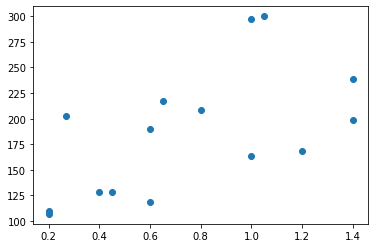

<Figure size 432x288 with 0 Axes>

In [63]:
data = pd.DataFrame(columns=["mass", "magnitude"])
for filename in os.listdir(processed_folder):
    df = pd.read_csv(f"{processed_folder}/{filename}")
    start_value = df.iloc[0:10]["value"].mean()
    end_value = df.iloc[-10:]["value"].mean()
    max_value = df["value"].max()
    time_of_max = df["time"][df["value"] == max_value].values[0]
    print(time_of_max)
    # get first value after time_of_max that is less than start_value
    time_of_drop = df["time"][(df["time"] > time_of_max) & (df["value"] < start_value)].values[0]
    mass = filename.split("_")[0]
    #data.loc[len(data)] = [mass, time_of_drop - time_of_max]
    #data.loc[len(data)] = [mass, (max_value - start_value) / (end_value - start_value)]
    data.loc[len(data)] = [mass, max_value - end_value]

data["mass"] = data["mass"].astype(float)
data["magnitude"] = data["magnitude"].astype(float)
plt.scatter(data["mass"], data["magnitude"])
plt.show()
plt.clf()


processed_CM/0.2_0.csv
value: -1.8157894736842106
-0.025131193029175623
3863 3863


<Figure size 432x288 with 0 Axes>

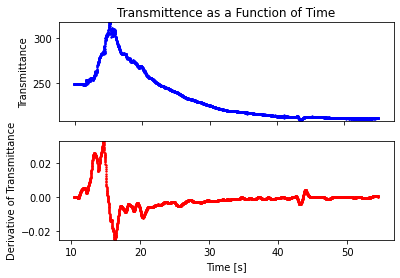

processed_CM/0.2_1.csv
value: -1.9708621207569825
-0.02224814494791351
3926 3926


<Figure size 432x288 with 0 Axes>

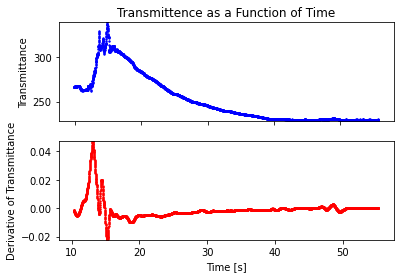

processed_CM/0.267_0.csv
value: -2.759259259259259
-0.0353609465460643
5612 5612


<Figure size 432x288 with 0 Axes>

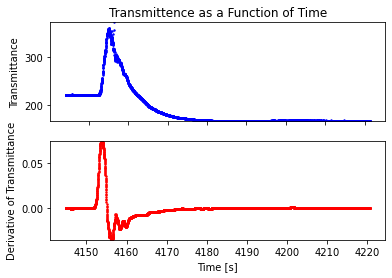

processed_CM/0.4_0.csv
value: -1.4912621359223304
-0.017548788154989173
5880 5880


<Figure size 432x288 with 0 Axes>

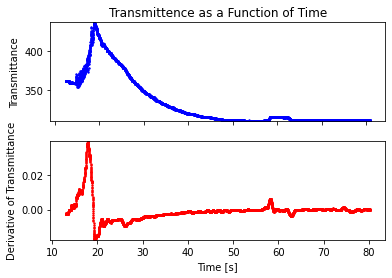

processed_CM/0.45_0.csv
value: -0.00611353711790388
-0.040321956970868766
3427 3427


<Figure size 432x288 with 0 Axes>

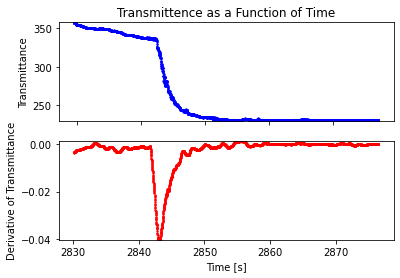

processed_CM/0.6_1.csv
value: -2.035047144636187
-0.0170304897379522
5047 5047


<Figure size 432x288 with 0 Axes>

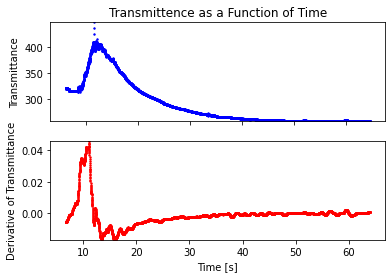

processed_CM/0.6_0.csv
value: -0.7727952167414048
-0.019879988811007974
3573 3573


<Figure size 432x288 with 0 Axes>

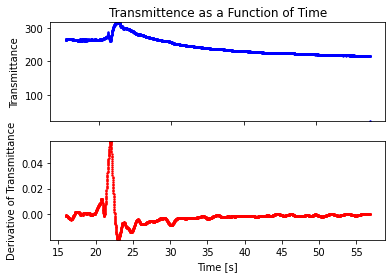

processed_CM/0.65_0.csv
value: -1.9547511312217196
-0.026868562169516552
4489 4489


<Figure size 432x288 with 0 Axes>

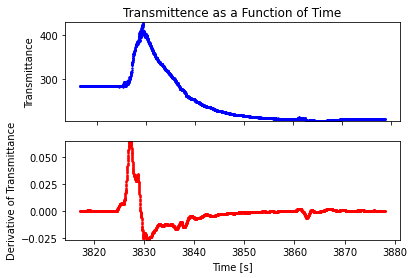

processed_CM/0.8_0.csv
value: -1.4167741935483875
-0.028655181056720637
4178 4178


<Figure size 432x288 with 0 Axes>

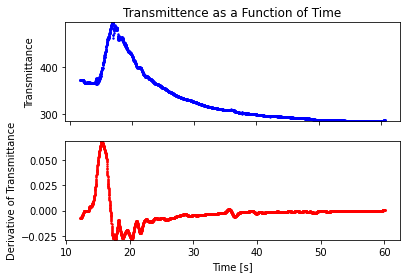

processed_CM/1.0_1.csv
value: -1.7051579691127483
-0.0359836318385607
3921 3921


<Figure size 432x288 with 0 Axes>

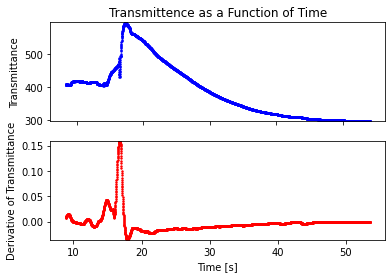

processed_CM/1.0_0.csv
value: -0.9069767441860465
-0.04038647637154556
4343 4343


<Figure size 432x288 with 0 Axes>

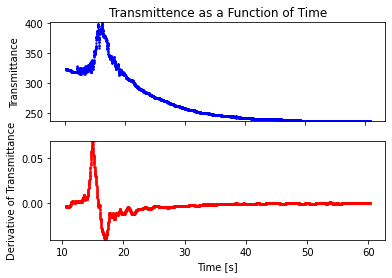

processed_CM/1.05_0.csv
value: -1.6785714285714286
-0.09959624328225375
4775 4775


<Figure size 432x288 with 0 Axes>

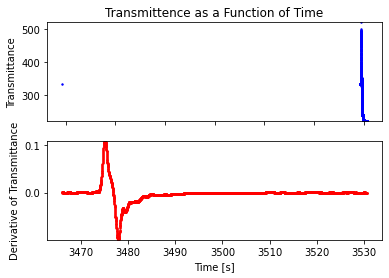

processed_CM/1.2_0.csv
value: -1.6099071207430342
-0.0261249003954598
3179 3179


<Figure size 432x288 with 0 Axes>

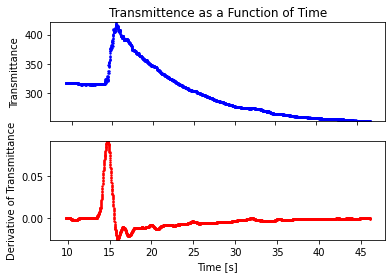

processed_CM/1.4_0.csv
value: -3.6185567010309274
-0.033919715917917086
3905 3905


<Figure size 432x288 with 0 Axes>

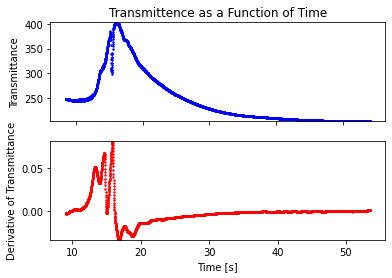

processed_CM/1.4_1.csv
value: -1.1846435100548451
-0.03682480342066488
4064 4064


<Figure size 432x288 with 0 Axes>

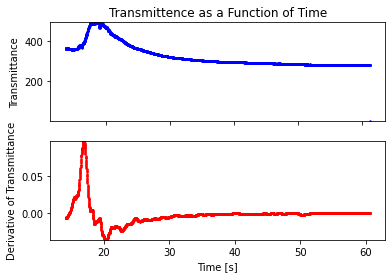

In [54]:
def make_graphs(filename):
    df = pd.read_csv(filename)
    start_value = df.iloc[0:10]["value"].mean()
    end_value = df.iloc[-10:]["value"].mean()
    max_value = df["value"].max()
    print("value:", (max_value - start_value) / (end_value - start_value))
    # plt.scatter(df["time"], df["value"])
    slopes = []
    # shrink point size
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx() 
    # get derivative of value with numerical differentiation
    slopes = []
    for i in range(50, len(df) - 50):
        slope = np.polyfit(df.iloc[i-50:i+50]["time"], df.iloc[i-50:i+50]["value"], 1)[0]
        slopes.append(slope)
    slopes = np.array(slopes)
    print(slopes[~np.isnan(slopes)].min())
    print(len(df["time"][50:-50]/1000), len(slopes))
    line1 = ax1.scatter(df["time"]/1000, df["value"], s=2, label="Transmittance")
    line2 = ax2.scatter(df["time"][50:-50]/1000, slopes, s=2, color='r', label="Derivative of Transmittance")
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='lower left')
    ax1.set_ylim(df["value"].min(), df["value"].max())
    ax2.set_ylim(slopes[~np.isnan(slopes)].min(), slopes[~np.isnan(slopes)].max())
    # plt.xlim(0,40)
    plt.xlabel("Time [s]")
    ax1.set_ylabel("Transmittance")
    ax2.set_ylabel("Derivative of Transmittance")
    ax1.set_xlabel("Time [s]")
    plt.title("Transmittence as a Function of Time for 3.2g of NaOH")
    #plt.show()
    plt.clf()
    # vertically stacked graphs
    fig, axs = plt.subplots(2)
    axs[0].scatter(df["time"]/1000, df["value"], s=2, color='b')
    axs[1].scatter(df["time"][50:-50]/1000, slopes, s=2, color='r')
    axs[0].set_ylim(df["value"].min(), df["value"].max())
    axs[1].set_ylim(slopes[~np.isnan(slopes)].min(), slopes[~np.isnan(slopes)].max())
    axs[0].set_ylabel("Transmittance")
    axs[1].set_ylabel("Derivative of Transmittance")
    axs[1].set_xlabel("Time [s]")
    axs[0].set_title("Transmittence as a Function of Time")
    #dont show x axis label for top graph
    plt.setp(axs[0].get_xticklabels(), visible=False)
    plt.savefig("transmittance_graph.png", dpi=300)
    plt.show()

folder = "processed_CM"
filenames = os.listdir(folder)
filenames = sorted(filenames, key=lambda x: float(x.split("_")[0]))
filenames = [f"{folder}/{filename}" for filename in filenames]
for file in filenames:
    print(file)
    make_graphs(file)

100%|██████████| 44/44 [01:48<00:00,  2.46s/it]

     mass     slope
39  1.000 -0.000078
36  1.000 -0.016141
33  1.250 -0.015643
32  1.250 -0.015752
27  1.500 -0.027711
26  1.500 -0.004012
30  1.500 -0.004012
5   1.750 -0.000036
7   1.750 -0.000225
18  2.000 -0.034552
17  2.000 -0.028245
10  2.250 -0.026060
11  2.250 -0.017993
41  2.500 -0.027783
40  2.500 -0.050110
20  2.750 -0.046340
14  2.750 -0.032890
28  3.000 -0.048181
25  3.000 -0.028494
29  3.000 -0.042280
24  3.000 -0.039578
21  3.125 -0.035790
23  3.200 -0.067841
9   3.250 -0.076152
12  3.250 -0.046760
43  3.300 -0.059847
0   3.375 -0.030036
16  3.400 -0.064206
38  3.500 -0.096495
37  3.500 -0.041558
35  3.500 -0.037143
42  3.500 -0.077118
31  3.500 -0.078592
22  3.600 -0.093708
1   3.625 -0.051768
34  3.700 -0.071508
15  3.750 -0.090241
19  3.750 -0.072006
13  3.800 -0.089858
8   3.875 -0.066518
3   3.900  0.000231
6   4.000  0.000260
4   4.000 -0.074592
2   4.000 -0.000091
Exponential fit
r2 = 0.8298685247430382
Quadratic fit
r2 = 0.8436746296939838
Coefficients: [ 0.0167

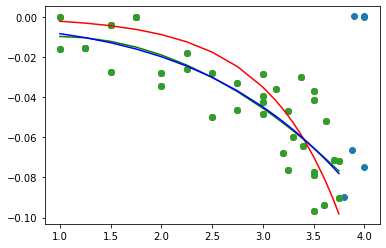

r2 = 0.8603837361134058
Coefficients: [ -52.66158289 -284.98595509]
Intercept: 1.1882173401149378


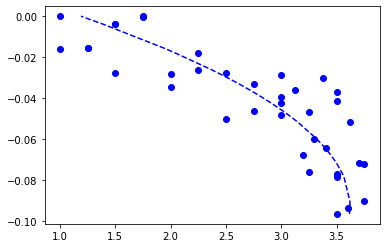

In [64]:
def get_slope_window(data: pd.DataFrame, window_size: int):
    value_buffer = []
    time_buffer = []
    slope_buffer = []
    times = []
    slopes = []
    values = []
    for i in range(window_size):
        value_buffer.append(data.iloc[i]["value"])
        time_buffer.append(data.iloc[i]["time"])
        slope_buffer.append(0)
    biggest_slope = 0
    index = 0
    for i in range(window_size, len(data)):
        slope = (data.iloc[i]["value"] - value_buffer[index]) / (data.iloc[i]["time"] - time_buffer[index])
        slope_avg = np.mean(slope_buffer)
        value_avg = np.mean(value_buffer)
        slopes.append(slope_avg)
        values.append(value_avg)
        times.append(data.iloc[i]["time"])
        if slope < biggest_slope and value_avg < 950:
            biggest_slope = slope_avg
        value_buffer[index] = data.iloc[i]["value"]
        time_buffer[index] = data.iloc[i]["time"]
        slope_buffer[index] = slope
        index = (index + 1) % window_size
        # two y axes
    """ fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.scatter(times, slopes, color='r')
    ax2.scatter(times, values, color='b')
    ax2.set_ylim(600, 950)
    plt.show() """

    return biggest_slope

def plot_new_slopes(window_size, folder="prodcessed_data"):
    df = pd.DataFrame(columns=["mass", "slope"])
    for file in tqdm(pathlib.Path(folder).iterdir(), total=len(list(pathlib.Path(folder).iterdir()))):
        mass = float(file.stem.split("_")[0])
        data = pd.read_csv(file)
        slope = get_slope_window(data, window_size)
        df.loc[len(df)] = [mass, slope]
    df = df.sort_values("mass")
    plt.scatter(df["mass"], df["slope"])
    print(df)
    df = df[df["slope"] != 0]
    df = df[df["slope"] > -0.3]
    df = df[df["mass"] <= 3.75]

    print("Exponential fit")
    slope, intercept = np.polyfit(df["mass"], np.log(np.abs(df["slope"])), 1)
    plt.scatter(df["mass"], df["slope"])
    plt.plot(df["mass"], -np.exp(slope*df["mass"] + intercept), color='r')
    mse = np.mean((np.exp(slope*df["mass"] + intercept) - np.abs(df["slope"]))**2)
    #print(f"mse = {mse}")
    print(f"r2 = {np.corrcoef(np.exp(slope*df['mass'] + intercept), np.abs(df['slope']))[0, 1]}")

    df["mass^2"] = df["mass"]**2
    df["mass^4"] = df["mass"]**4
    df["mass^6"] = df["mass"]**4

    print("Quadratic fit")
    model = LinearRegression(fit_intercept=True)
    model.fit(df[["mass", "mass^2"]], df["slope"])
    # print("quadratic mse", np.mean((model.predict(df[["mass", "mass^2"]]) - df["slope"])**2))
    print("r2 =", np.corrcoef(model.predict(df[["mass", "mass^2"]]), df["slope"])[0, 1])
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    plt.plot(df["mass"], model.predict(df[["mass", "mass^2"]]), color='g')
    
    print("Quartic fit")
    model = LinearRegression(fit_intercept=True)
    model.fit(df[["mass", "mass^2", "mass^4"]], df["slope"])
    #print("quartic mse", np.mean((model.predict(df[["mass", "mass^2", "mass^4"]]) - df["slope"])**2))
    print("r2 =", np.corrcoef(model.predict(df[["mass", "mass^2", "mass^4"]]), df["slope"])[0, 1])
    #print("Coefficients:", model.coef_)
    plt.plot(df["mass"], model.predict(df[["mass", "mass^2", "mass^4"]]), color='b')

    plt.scatter(df["mass"], df["slope"])
    plt.show()


    model = LinearRegression(fit_intercept=True)
    df["slope^2"] = df["slope"]**2
    model.fit(df[["slope", "slope^2"]], df["mass"])
    print("r2 =", np.corrcoef(model.predict(df[["slope", "slope^2"]]), df["mass"])[0, 1])
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    df.sort_values("slope", inplace=True)
    plt.scatter(df["mass"], df["slope"], color='b')
    plt.plot(model.predict(df[["slope", "slope^2"]]), df["slope"], color='b', linestyle='dashed')
    plt.show()
    return df

df = plot_new_slopes(120, folder="processed_data")

     mass     slope
0   1.000 -0.000078
1   1.000 -0.016141
2   1.250 -0.015643
3   1.250 -0.015752
4   1.500 -0.027711
5   1.500 -0.004012
6   1.500 -0.004012
7   1.750 -0.000036
8   1.750 -0.000225
9   2.000 -0.034552
10  2.000 -0.028245
11  2.250 -0.026060
12  2.250 -0.017993
13  2.500 -0.027783
14  2.500 -0.050110
15  2.750 -0.046340
16  2.750 -0.032890
17  3.000 -0.048181
18  3.000 -0.028494
19  3.000 -0.042280
20  3.000 -0.039578
21  3.125 -0.035790
22  3.200 -0.067841
23  3.250 -0.076152
24  3.250 -0.046760
25  3.300 -0.059847
26  3.375 -0.030036
27  3.400 -0.064206
28  3.500 -0.096495
29  3.500 -0.041558
30  3.500 -0.037143
31  3.500 -0.077118
32  3.500 -0.078592
r2 = 0.8328010023022538
Coefficients: [ -51.33379167 -286.48020872]
Intercept: 1.208776716946928


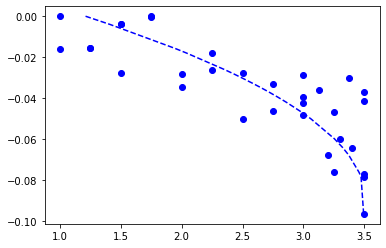

Standard error of mass prediction
0.4587385738655706


In [75]:
df = pd.read_csv("methylene_blue_slopes.csv")
df = df[df["slope"] != 0]
df = df[df["slope"] > -0.3]
df = df[df["mass"] <= 3.5]
print(df)
model = LinearRegression(fit_intercept=True)
df["slope^2"] = df["slope"]**2
model.fit(df[["slope", "slope^2"]], df["mass"])
print("r2 =", np.corrcoef(model.predict(df[["slope", "slope^2"]]), df["mass"])[0, 1])
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
df.sort_values("slope", inplace=True)
plt.scatter(df["mass"], df["slope"], color='b')
plt.plot(model.predict(df[["slope", "slope^2"]]), df["slope"], color='b', linestyle='dashed')
plt.show()

#get standard error of mass prediction
print("Standard error of mass prediction")
print(np.sqrt(np.mean((model.predict(df[["slope", "slope^2"]]) - df["mass"])**2)))


r2 = 0.8603837361134057
Coefficients: [ -52.66158289 -284.98595509]
Intercept: 1.1882173401149383


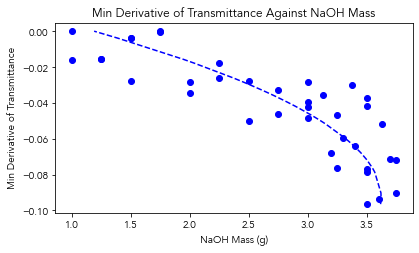

In [111]:
plt.rcParams["font.family"] = "Avenir"
plt.figure(figsize=(6.4, 3.5))
model = LinearRegression(fit_intercept=True)
df["slope^2"] = df["slope"]**2
model.fit(df[["slope", "slope^2"]], df["mass"])
r2 = np.corrcoef(model.predict(df[["slope", "slope^2"]]), df["mass"])[0, 1]
print("r2 =", np.corrcoef(model.predict(df[["slope", "slope^2"]]), df["mass"])[0, 1])
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
df.sort_values("slope", inplace=True)
plt.scatter(df["mass"], df["slope"], color='b')
plt.plot(model.predict(df[["slope", "slope^2"]]), df["slope"], color='b', linestyle='dashed')
plt.xlabel("NaOH Mass (g)")
plt.ylabel("Min Derivative of Transmittance")
plt.title("Min Derivative of Transmittance Against NaOH Mass")
plt.savefig("calibration.png", dpi=300)
plt.show()

0it [00:00, ?it/s]

44it [00:00, 500.23it/s]

R2: -0.6123614448145279


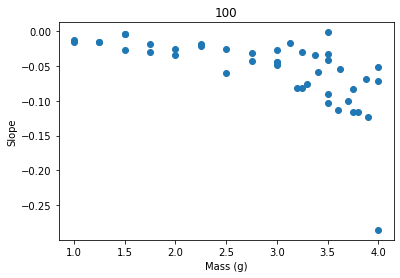

' \nfor slope_range in [50, 100, 200, 300, 400, 500]:\n    graph_slopes(slope_range) '

In [22]:
def get_slope_df(slope_range: int):
    df = pd.DataFrame(columns=["mass", "slope"])

    for file in tqdm(pathlib.Path(processed_folder).iterdir()):
        data = pd.read_csv(file)
        slope = get_slope(data, slope_range)[0]
        mass = float(file.stem.split("_")[0])
        df.loc[len(df)] = [mass, slope]

    return df

def graph_slopes(slope_range: int):
    df = get_slope_df(slope_range)

    print("R2:", np.corrcoef(df["mass"], df["slope"])[0, 1])
    plt.scatter(df["mass"], df["slope"])
    #best fit line
    m, b = np.polyfit(df["mass"], df["slope"], 1)
    # plt.plot(df["mass"], m*df["mass"] + b)
    plt.xlabel("Mass (g)")
    plt.ylabel("Slope")
    plt.title(slope_range)
    plt.show()

graph_slopes(100)

""" 
for slope_range in [50, 100, 200, 300, 400, 500]:
    graph_slopes(slope_range) """

0it [00:00, ?it/s]

44it [00:00, 582.57it/s]


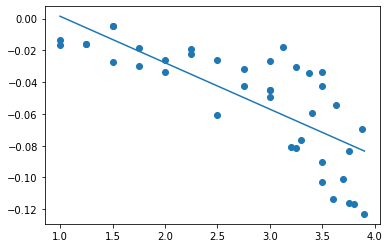

R2: 0.5816512069880043


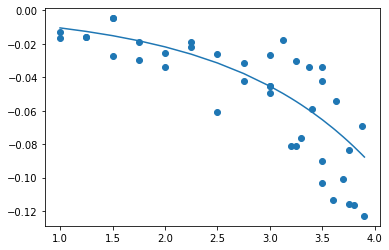

R2: 0.9366391832341763
R2: 0.6887103088474189
Coefficients: [ 0.14520117 -0.1199103   0.03954159 -0.00486932]


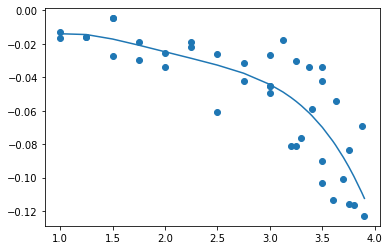

In [27]:
df = get_slope_df(100)
# test linear fit
df = df.drop(df[(df["mass"] == 3.5) & (df["slope"] > -0.02)].index)
df = df.drop(df[df["mass"] >= 4.0].index)

df.sort_values("mass", inplace=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(df["mass"], df["slope"])
plt.scatter(df["mass"], df["slope"])
plt.plot(df["mass"], slope*df["mass"] + intercept)
plt.show()
print("R2:", r_value**2)

# do exponential fit
slope, intercept = np.polyfit(df["mass"], np.log(np.abs(df["slope"])), 1)
plt.scatter(df["mass"], df["slope"])
plt.plot(df["mass"], -np.exp(slope*df["mass"] + intercept))
# plt.ylim(-0.15,0)
plt.show()
print("R2:", np.corrcoef(df["mass"], -np.exp(slope*df["mass"] + intercept))[0, 1]**2)

# do quartic fit
df["mass^2"] = df["mass"]**2
df["mass^3"] = df["mass"]**3
df["mass^4"] = df["mass"]**4

model = LinearRegression()
model.fit(df[["mass", "mass^2", "mass^3", "mass^4"]], df["slope"])
print("R2:", model.score(df[["mass", "mass^2", "mass^3", "mass^4"]], df["slope"]))
print("Coefficients:", model.coef_)

plt.scatter(df["mass"], df["slope"])
plt.plot(df["mass"], model.predict(df[["mass", "mass^2", "mass^3", "mass^4"]]))
plt.show()


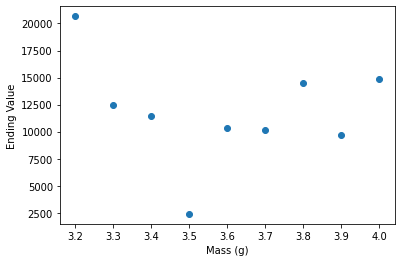

In [5]:
ending_value = {}
for file in pathlib.Path(processed_folder).iterdir():
    data = pd.read_csv(file)
    middle_index = get_slope(data, 100)[1]
    stop_index = None
    for i in range(middle_index, len(data)):
        if data.iloc[i-50:i]["value"].std() < 1:
            stop_index = i
            break
    ending_value[float(file.stem.split("_")[0])] = data.iloc[stop_index]["time"] - data.iloc[0]["time"]

plt.scatter(list(ending_value.keys()), list(ending_value.values()))
plt.xlabel("Mass (g)")
plt.ylabel("Ending Value")
plt.show()